# 임베딩 방법 비교



## Data

자료는 한국전통지식포털에 실려 있는 전통의학처방 19171 건을 사용하였다. 

In [1]:
from collections import Counter
import numpy as np
import pandas as pd



In [2]:
corpus_path = "../../_data/formulas.txt"
corpus_ = open( corpus_path, 'r', encoding='utf-8' ).read()
header, corpus_raw = corpus_.split("***")
corpus_raw = corpus_raw.strip()
corpus = [ line.strip() for line in corpus_raw.split("\n") ]
corpus_tokenized = [ line.split() for line in corpus ]

print( "# Corpus Description" )
print( header.strip() )
print()
print( "# Corpus Size: ", len(corpus) )


# Corpus Description
- 출처 : 한국전통지식포탈(www.koreantk.com) > 전통의료 > 처방
- 특징 : 본초 구성만 추출한 데이터
- 데이터 생성일 : 2016.01.16

# Corpus Size:  19162


## Data Overview

In [3]:
size_per_doc = [ len( doc ) for doc in corpus_tokenized ]
all_tokens = sum( corpus_tokenized, [] )
type_with_count_ = Counter( all_tokens )
type_with_count = type_with_count_.items()
count_per_type = list( type_with_count_.values() )

In [4]:
print( "# 처방 크기")
print( "* 가장 큰 처방의 크기:", max( size_per_doc ) )
print( "* 가장 작은 처방의 크기:", min( size_per_doc ) )
print( "* 처방 크기 평균:", np.mean( size_per_doc ) )
print( "* 처방 크기 중간값:", np.median( size_per_doc ) )
print() 
print( "# 본초 출현 빈도")
print( "* 가장 많은 출현 빈도:", max( count_per_type ) )
print( "* 가장 적은 출현 빈도:", min( count_per_type ) )
print( "* 본초 1개 평균 출현 빈도:", np.mean( count_per_type ) )
print( "* 본초 1개 중간 출현 빈도:", np.median( count_per_type ) )

# 처방 크기
* 가장 큰 처방의 크기: 59
* 가장 작은 처방의 크기: 1
* 처방 크기 평균: 7.316459659743241
* 처방 크기 중간값: 6.0

# 본초 출현 빈도
* 가장 많은 출현 빈도: 7372
* 가장 적은 출현 빈도: 1
* 본초 1개 평균 출현 빈도: 76.11183496199783
* 본초 1개 중간 출현 빈도: 6.0


In [5]:
topn = 20
herb_, freq_ = list( zip( *type_with_count_.most_common( topn ) ) )
print( "# 가장 많이 사용된 {}가지 본초".format(topn) )
pd.DataFrame( {"본초": herb_, "빈도": freq_ } )

# 가장 많이 사용된 20가지 본초


,본초,빈도
0,감초,7372
1,당귀,3834
2,인삼,3810
3,백출,3137
4,진피,2989
5,천궁,2701
6,반하,2340
7,황금,2052
8,백복령,1990
9,방풍,1943


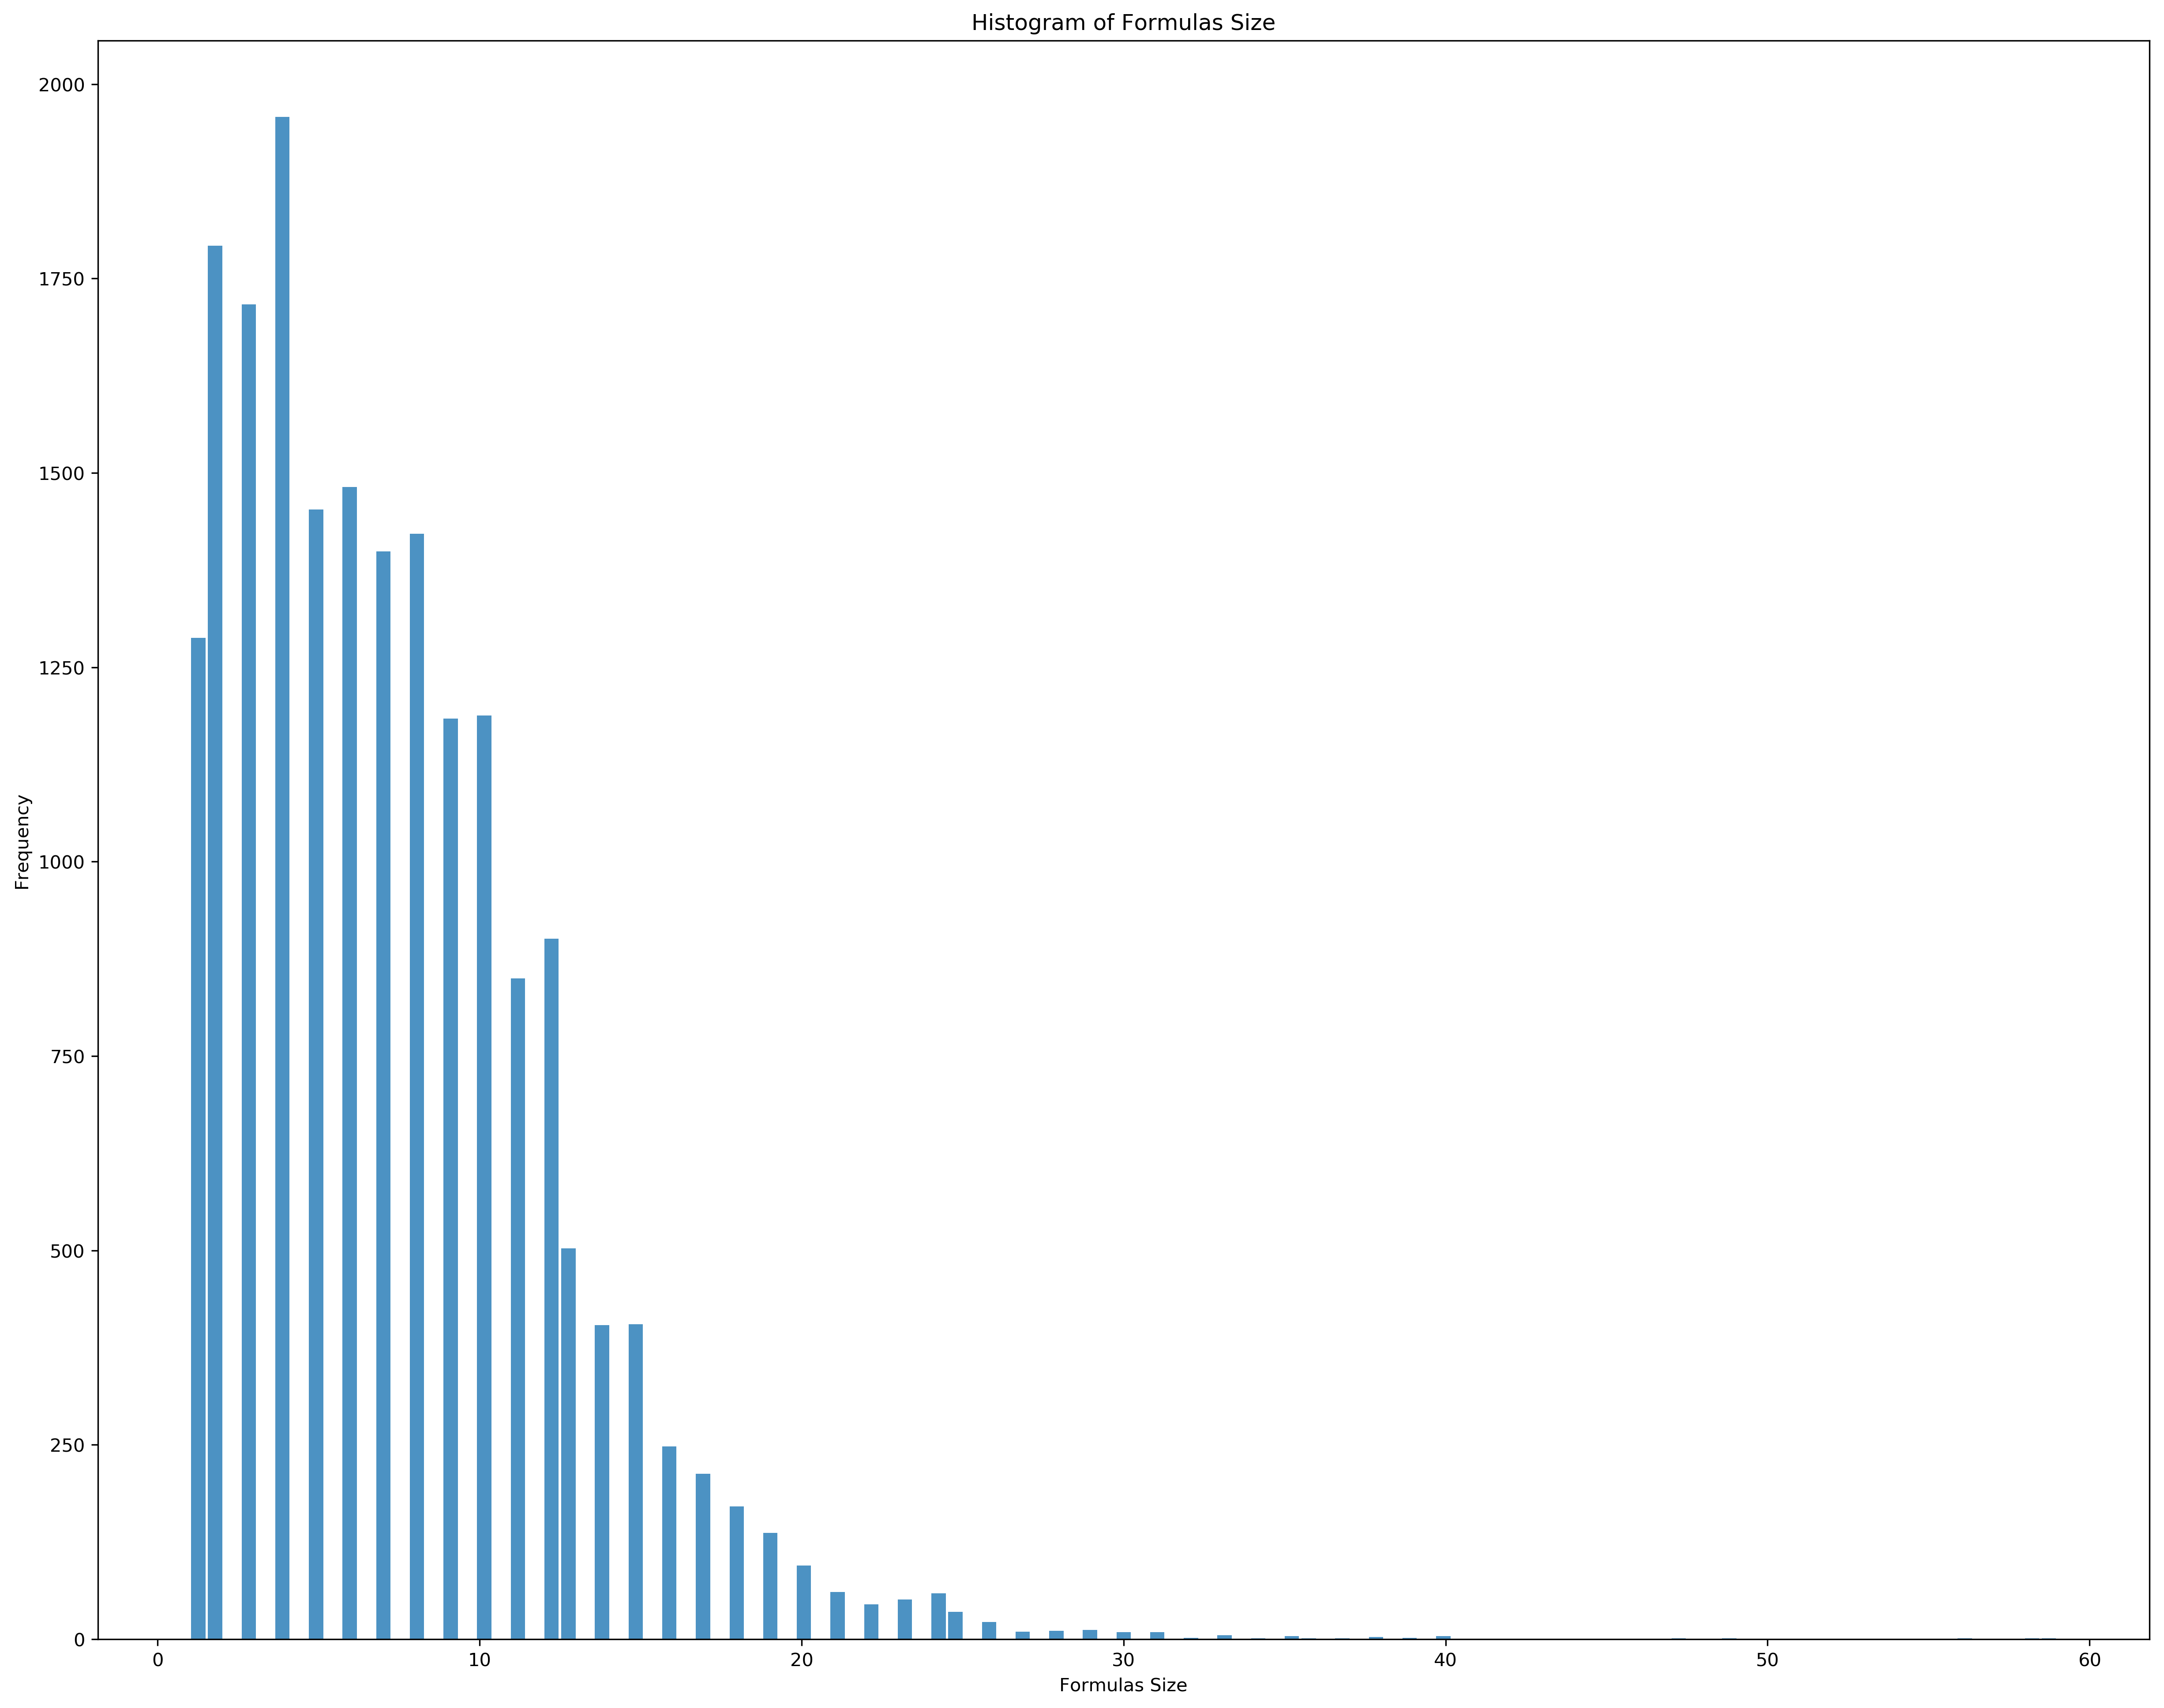

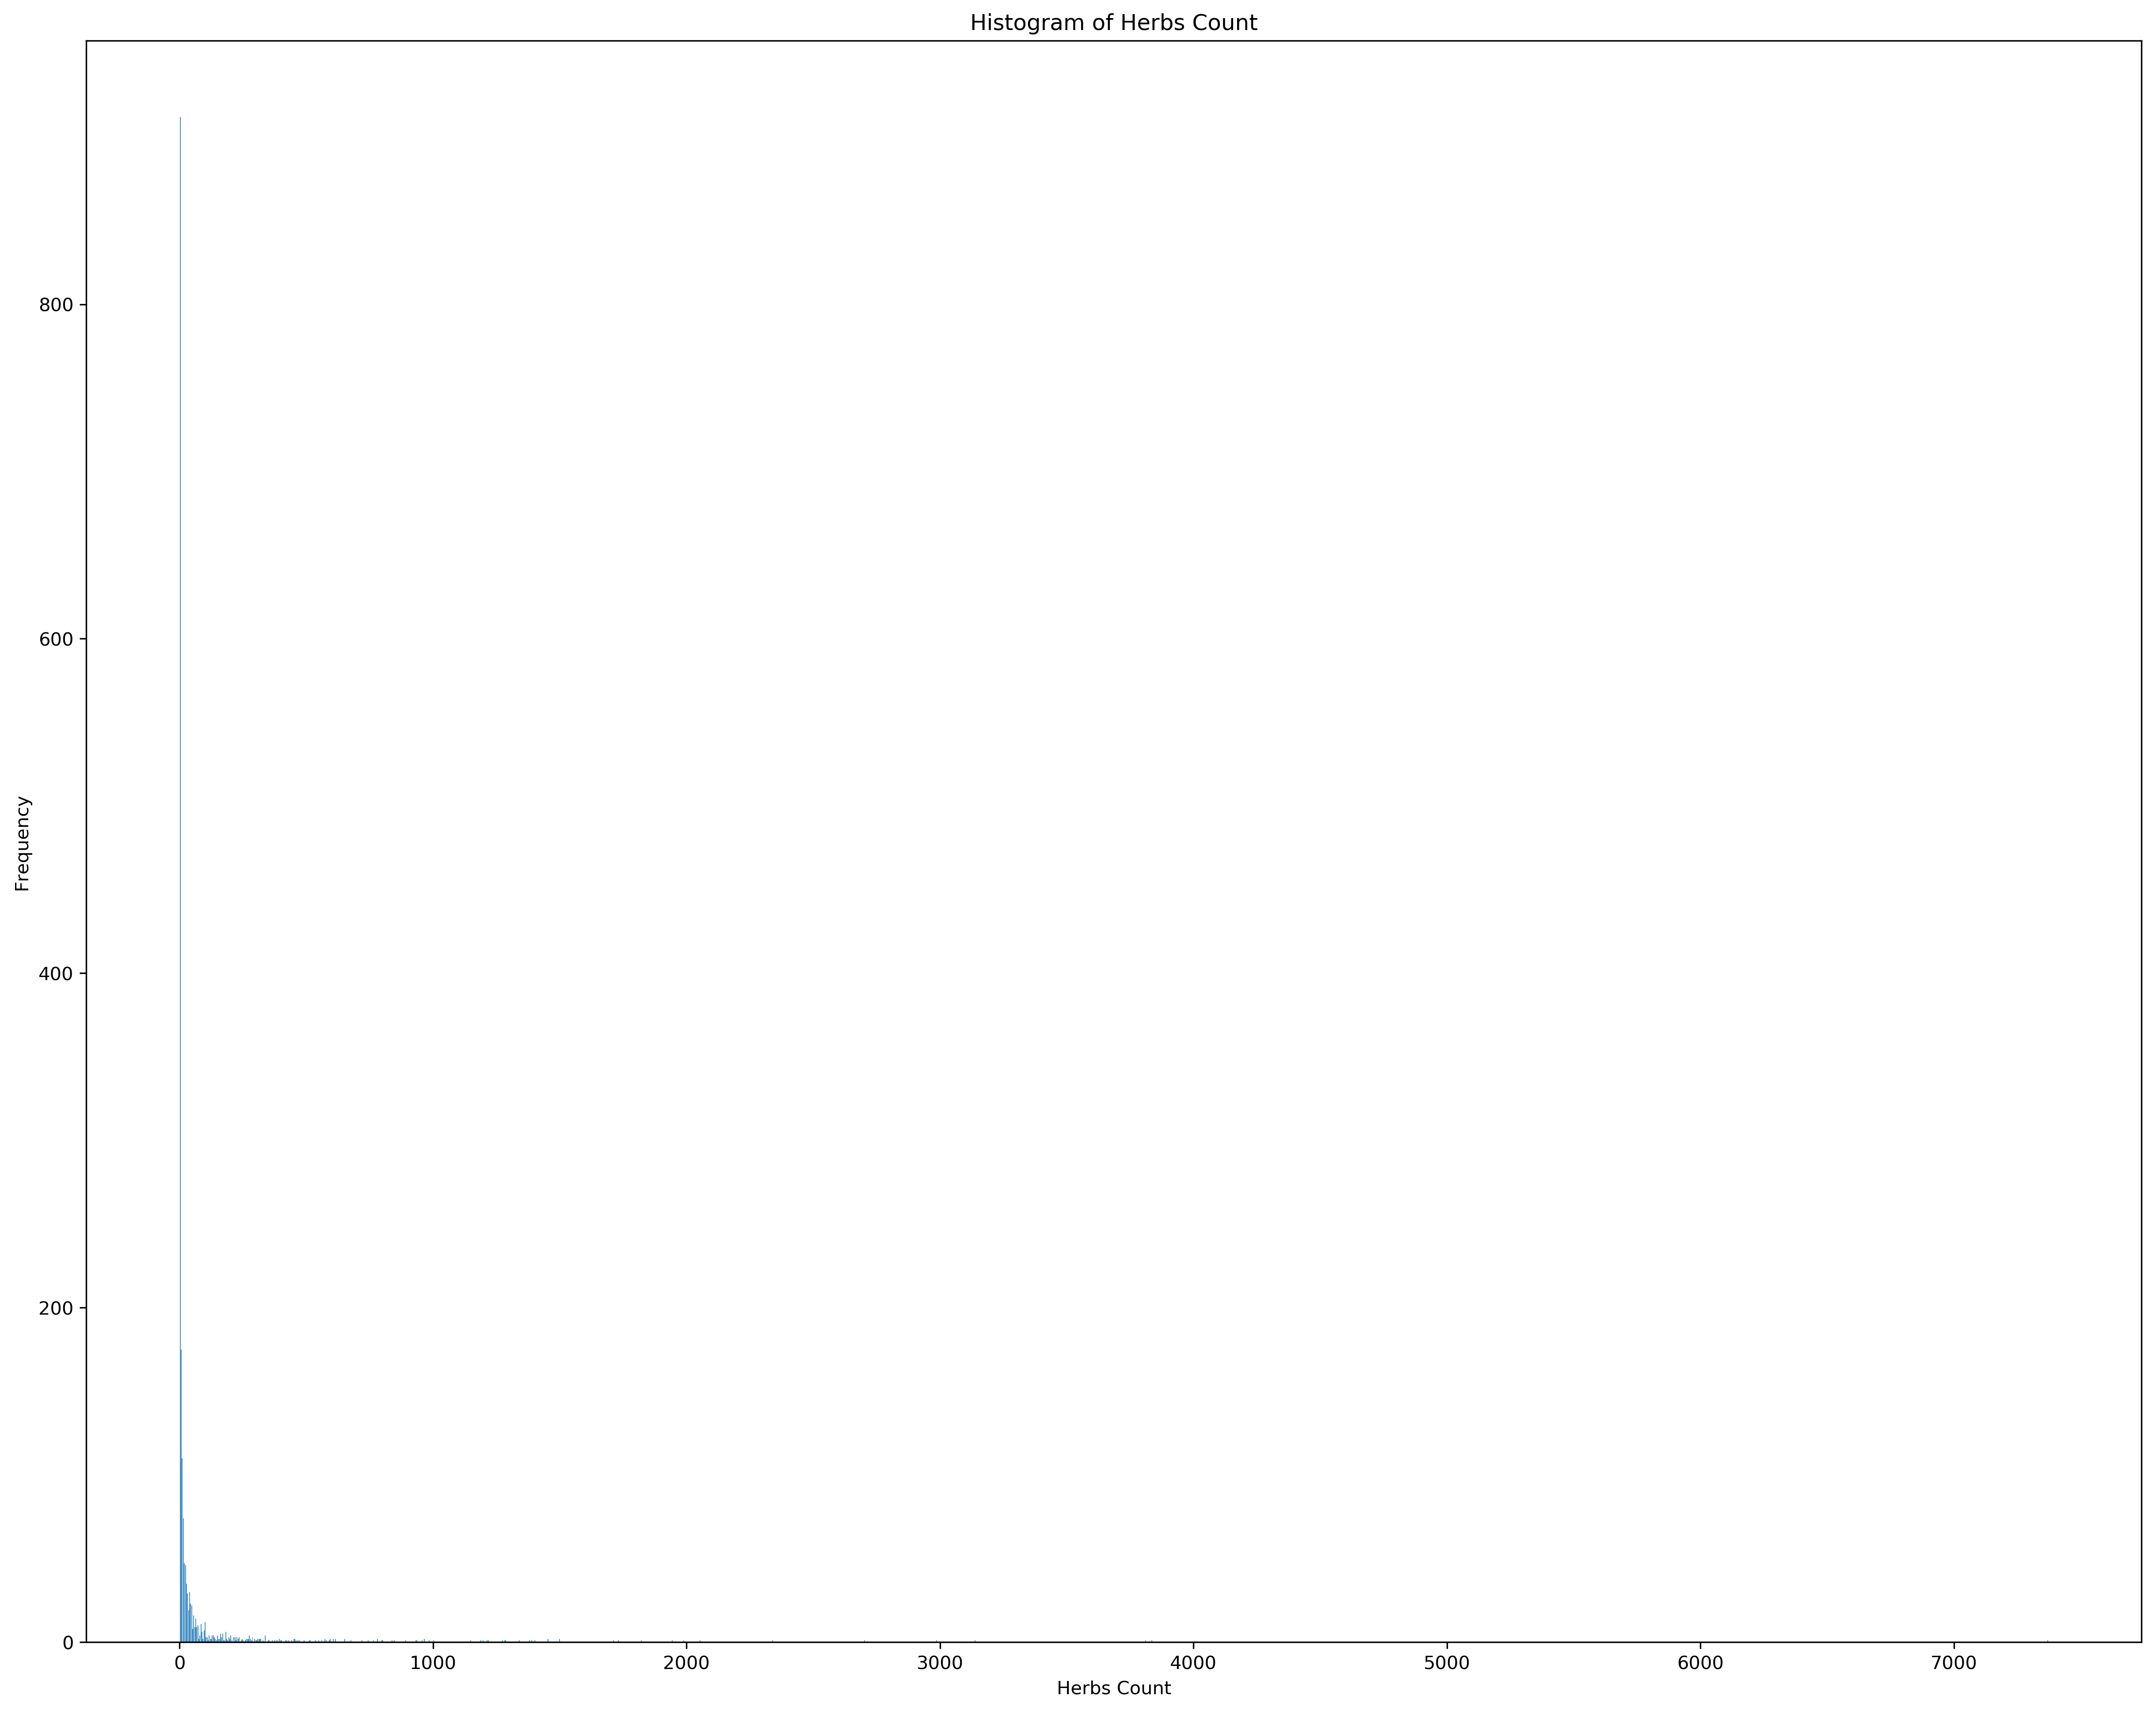

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline  

figure(num=None, figsize=(20, 16), dpi=300, facecolor='w', edgecolor='k')
freq_, bins_, _ = plt.hist( size_per_doc, bins='auto', alpha=0.8, rwidth=0.85 )  # arguments are passed to np.histogram
plt.title("Histogram of Formulas Size")
plt.xlabel('Formulas Size')
plt.ylabel('Frequency')
plt.show()

figure(num=None, figsize=(20, 16), dpi=300, facecolor='w', edgecolor='k')
freq_, bins_, _ = plt.hist( count_per_type, bins='auto', alpha=0.8, rwidth=0.85 )  # arguments are passed to np.histogram
plt.title("Histogram of Herbs Count")
plt.xlabel('Herbs Count')
plt.ylabel('Frequency')
plt.show()

In [7]:
# 분석 대상에서 빈도가 너무 작은 본초를 제거하고 크기가 너무 작거나 큰 처방도 제외함

# 본초 : 출현빈도 6회 이상만 사용
min_df = 6
type_cutoff = [ t_ for t_, f_ in type_with_count if f_ < min_df ] 
corpus_tokenized_filterd = [ [ t_ for t_ in doc_tokenized if t_ not in type_cutoff ]  for doc_tokenized in corpus_tokenized ]

# 처방 : 2-24개 본초를 포함한 것만 사용
corpus_tokenized_cutoff = [ doc for doc in corpus_tokenized_filterd if len( doc ) > 1 and len( doc ) < 25 ]
corpus_cutoff = [ " ".join( doc ) for doc in corpus_tokenized_cutoff ]

corpus_len = len( corpus_cutoff )
print( "# 최종적으로 {}가지 처방이 준비됨".format( corpus_len ) )

# 최종적으로 17528가지 처방이 준비됨


## Conter-based word embedding


### 1st order vector

* TF vector
* TF-IDF vector

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from time import time

In [9]:
# Build TF Matrix and TF-IDF Matrix

t0 = time()
tf_vectorizer = CountVectorizer( )
tf = tf_vectorizer.fit_transform( corpus_cutoff )
print( "TF Matrix done in {:03f}s.".format(time() - t0) )

t0 = time()
tfidf_vectorizer = TfidfVectorizer( )
tfidf = tfidf_vectorizer.fit_transform( corpus_cutoff )
print( "TF-IDF Matrix done in {:03f}s.".format(time() - t0) )

doc_size, feature_size = tf.shape
print( "# 처방 개수: ", doc_size)
print( "# 본초 개수: ", feature_size, " ({}회 이상 사용된 본초)".format( min_df ) ) 

TF Matrix done in 0.105975s.
TF-IDF Matrix done in 0.111000s.
# 처방 개수:  17528
# 본초 개수:  916  (6회 이상 사용된 본초)


In [10]:
# Save TF and TFIDF matrix : sparse matrix이기 때문에 파일크기가 매우 크다. 
# np.savetxt("../../_data/formulas_tf.tsv", tf.toarray(), delimiter='\t', fmt="%10.3f" )
# np.savetxt("../../_data/formulas_tfidf.tsv", tfidf.toarray(), delimiter='\t', fmt="%10.3f" )

In [45]:
tf_feature_names = tf_vectorizer.get_feature_names()
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

freq_per_term = np.sum( tf, axis=0 ).flatten().tolist()[0]
size_per_doc = np.sum( tf, axis=1 ).flatten().tolist()[0]

In [12]:
term_vector_via_tf = tf.T
term_vector_via_tfidf = tfidf.T

### 2nd order vector 

* co-word vector
* t-score vector


##### 2.2.1. co-word vector

In [13]:
co_word = ( tf.T * tf )
term_vector_via_coword = co_word
print( "{}개 본초에 대해 {} 길이의 벡터 생성".format( *co_word.shape ) )

916개 본초에 대해 916 길이의 벡터 생성


##### 2.2.2. t-score vector

In [14]:
from scipy.sparse import lil_matrix
from tqdm import tqdm_notebook as tqdm
import math 

def t_score(o, e):
    return ( o - e ) / math.sqrt( o + 1 )


In [68]:
# Observed Value
observed_v = co_word.toarray()

# Expected Value
margin_x = np.full( co_word.shape, freq_per_term )
margin_y = margin_x.T
expected_v = np.divide(  np.multiply( margin_x, margin_y ),  sum( freq_per_term )   )

# T-score with addone smoothing
observed_v_add1 = np.add( observed_v, 1 )
t_score = np.divide( np.subtract( observed_v, expected_v ) , np.sqrt( observed_v_add1 ) )

from scipy import sparse
term_vector_via_tscore = sparse.csc_matrix( t_score )
print( "{}개 본초에 대해 {} 길이의 벡터 생성".format( *term_vector_via_tscore.shape ) )

916개 본초에 대해 916 길이의 벡터 생성


### 2. 신경망 모델

* word2vec
* GloVe

In [33]:
max_formula_length = max( size_per_doc ) 
print( "Window size: ", max_formula_length )

Window size:  24


#### word2vec

In [100]:
import gensim

vec_size = 64
pochs = 32

w2v = gensim.models.Word2Vec( size=vec_size, window=max_formula_length, min_count=min_df, workers=10 )
w2v_feature_names = w2v.build_vocab( corpus_tokenized_cutoff )
w2v.train( corpus_tokenized_cutoff, total_examples=len( corpus_tokenized_cutoff ), epochs=pochs)


(2687351, 4265440)

In [101]:
def w2v_most_similar( test_herb, n=4 ):
    return w2v.wv.most_similar( [ test_herb ], topn=n )

w2v_most_similar( "감초" )

[('자감초', 0.7568716406822205),
 ('분초', 0.5931779146194458),
 ('천궁', 0.42025676369667053),
 ('길경', 0.414787232875824)]

None


### 3. 결과 비교


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

class MostElem:
    
    def __init__(self, feature_list, embedding_matrix, max_n=4):
        self.feature_list = feature_list
        self.embedding_matrix = embedding_matrix
        self.max_n = max_n
    
    def most_similar( self, term ):
        i = self.feature_list.index( term )
        sims = cosine_similarity( self.embedding_matrix[i,:], self.embedding_matrix )
        most_sim_idx = sims.argsort()[0][-self.max_n-1:-1].tolist()
        most_sim_idx.reverse()
        return [ ( self.feature_list[i], sims[0][i] ) for i in most_sim_idx ] 


In [69]:
by_tf = MostElem( tf_feature_names, term_vector_via_tf, max_n=4  )
by_tfidf = MostElem( tfidf_feature_names, term_vector_via_tfidf, max_n=4  )
by_coword = MostElem( tf_feature_names, term_vector_via_coword, max_n=4  )
by_tscore = MostElem( tf_feature_names, term_vector_via_tscore, max_n=4  )

In [70]:
test_herb = "마황"

print( by_tf.most_similar( test_herb ) )
print( by_tfidf.most_similar( test_herb ) )
print( by_coword.most_similar( test_herb ) )
print( by_tscore.most_similar( test_herb ) )

[('행인', 0.28721734299750834), ('감초', 0.24584151568592272), ('백지', 0.18517107422504056), ('길경', 0.18333396320193188)]
[('행인', 0.32963011393686814), ('감초', 0.2349158473810841), ('계지', 0.17147951050534174), ('석고', 0.15853973896585388)]
[('감초', 0.7365295573964036), ('길경', 0.7002399889664821), ('행인', 0.6995080293847064), ('백지', 0.6870725101804177)]
[('길경', 0.8445128034931463), ('감초', 0.8355434270390679), ('백지', 0.834647009570784), ('방풍', 0.8273335101680387)]


In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
def generate_tokens_and_labels( model, word_list_with_index, model_type="dict" ):
    labels = []
    tokens = []
    
    if model_type=="dict":
        for word, index in word_list_with_index:
            tokens.append( model[word] )
            labels.append( word )
    else:
        for word, index in word_list_with_index:
            tokens.append( model[index] )
            labels.append( word )
            
    return (tokens, labels)


def tsne_model_fit_transform( tokens ):
    tsne_model = TSNE(n_components=2, n_iter=2000, init='pca', random_state=23)
    new_values = tsne_model.fit_transform( tokens )
    return new_values

def tsne_plot( new_values, labels ):
    "Creates and TSNE model and plots it"
    plt.figure( figsize=(8, 8) ) 
    for i in range( len( new_values ) ):
        plt.scatter( new_values[i][0], new_values[i][1] )
        plt.annotate(labels[i],
                     xy=( new_values[i][0], new_values[i][1] ),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    return plt


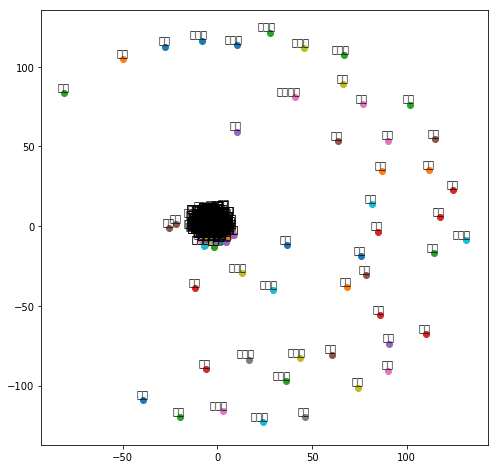

In [76]:
# plot herb_embedding_by_count
word_list_with_index = [ ( h, tf_feature_names.index( h ) )  for h in tf_feature_names ]
tokens, labels = generate_tokens_and_labels( term_vector_via_tf.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()


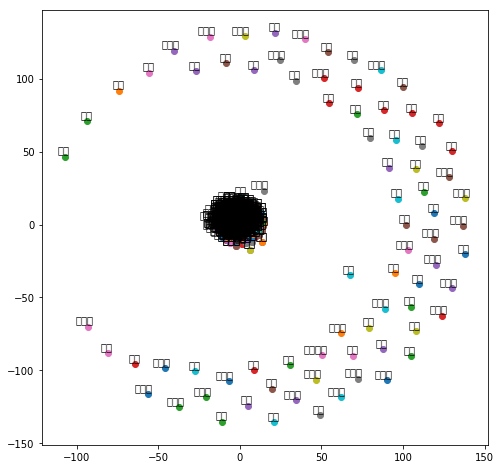

In [78]:
# plot herb_embedding_by_tfidf
word_list_with_index = [ ( h, tfidf_feature_names.index( h ) )  for h in tfidf_feature_names ]
tokens, labels = generate_tokens_and_labels( term_vector_via_tfidf.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()


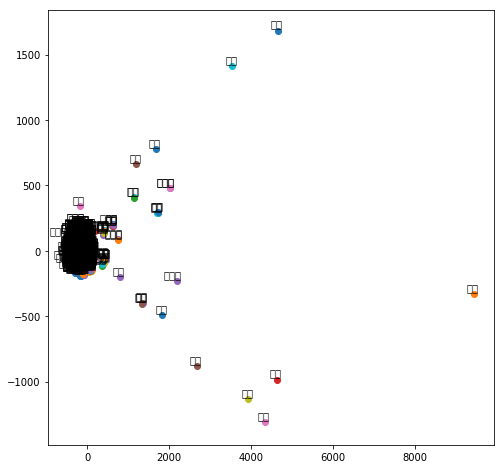

In [79]:
# plot herb_embedding_by_co-word
word_list_with_index = [ ( h, tf_feature_names.index( h ) )  for h in tf_feature_names ]
tokens, labels = generate_tokens_and_labels( term_vector_via_coword.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()


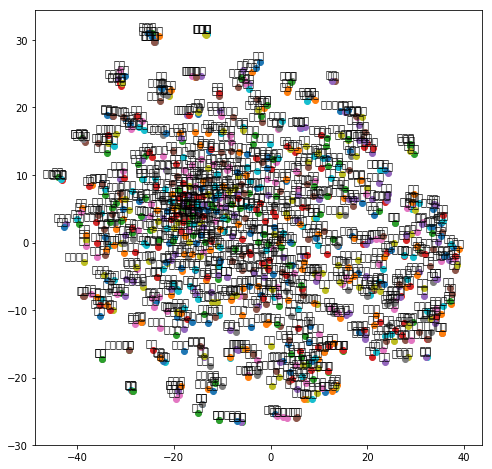

In [80]:
# plot herb_embedding_by_tscore
word_list_with_index = [ ( h, tf_feature_names.index( h ) )  for h in tf_feature_names ]
tokens, labels = generate_tokens_and_labels( term_vector_via_tscore.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()

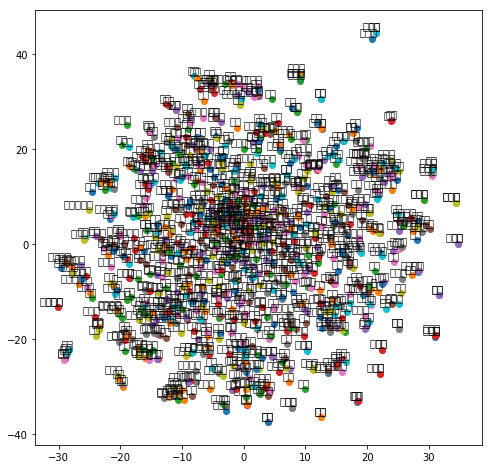

In [89]:
# plot word2vec
feature_names = list( w2v.wv.vocab.keys() )
word_list_with_index = [ ( h, feature_names.index( h ) )  for h in feature_names ]    
tokens, labels = generate_tokens_and_labels( w2v.wv, word_list_with_index, model_type="dict" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()


## 결론
